<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Food_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

#Loading the data

In [2]:
food_consumption =  pd.read_csv('/content/food_consumption.csv')

#Exploratory Data Analysis

In [3]:
food_consumption.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [ ]:
food_consumption.tail()

,country,food_category,consumption,co2_emmission
1425,Bangladesh,Milk - inc. cheese,21.91,31.21
1426,Bangladesh,Wheat and Wheat Products,17.47,3.33
1427,Bangladesh,Rice,171.73,219.76
1428,Bangladesh,Soybeans,0.61,0.27
1429,Bangladesh,Nuts inc. Peanut Butter,0.72,1.27


In [ ]:
food_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [ ]:
food_consumption.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [ ]:
food_consumption.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

#Data Cleaning

In [ ]:
#sum of missing values
food_consumption.isnull().sum()

,0
country,0
food_category,0
consumption,0
co2_emmission,0


# FOOD CARBON FOOTPRINT Data Analysis

The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

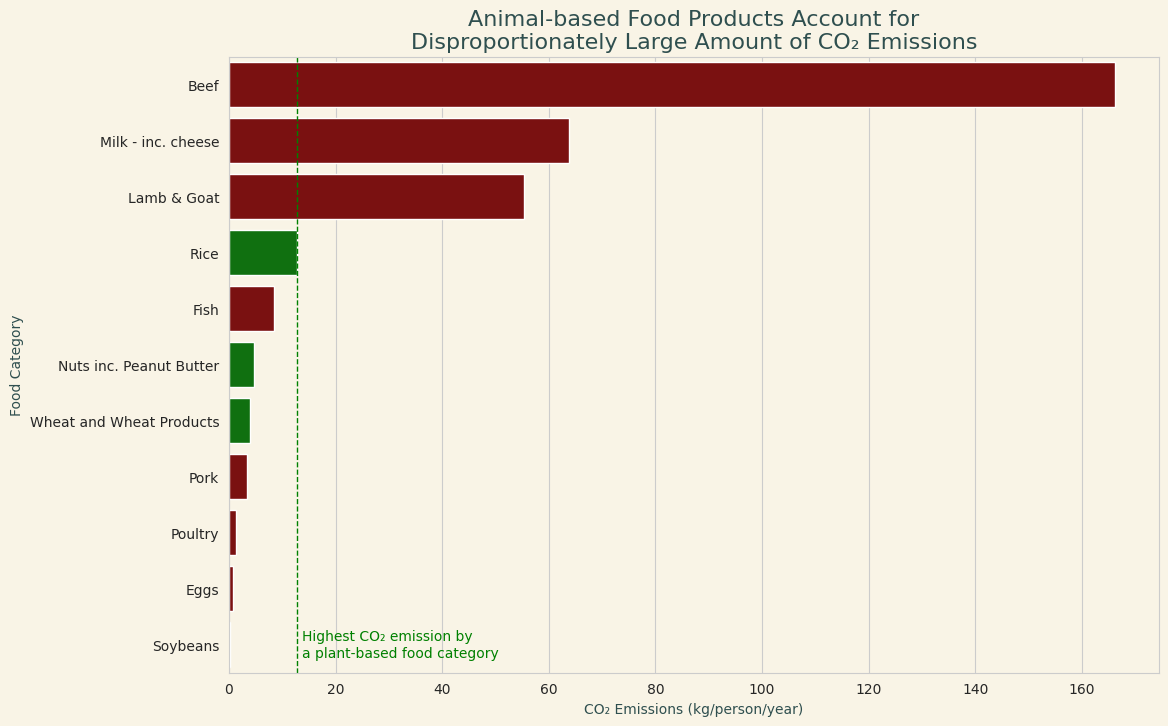

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Rename column for consistency if needed
food_consumption.rename(columns={'co2_emmission': 'co2_emission'}, inplace=True)

# Filter data for the five East African countries
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']
df_east_africa = food_consumption[food_consumption['country'].isin(east_african_countries)]

# Calculate the average CO₂ emission per person by food category
avg_co2_emission = df_east_africa.groupby('food_category')['co2_emission'].mean().reset_index()

# List of animal-based food categories
animal_based = ['Beef', 'Milk - inc. cheese', 'Lamb & Goat', 'Pork', 'Fish', 'Poultry', 'Eggs']

# Categorize food items as 'Animal' or 'Plant'-based
avg_co2_emission['type'] = avg_co2_emission['food_category'].apply(lambda x: 'Animal' if x in animal_based else 'Plant')

# Sort the data by CO₂ emission in descending order
avg_co2_emission = avg_co2_emission.sort_values(by='co2_emission', ascending=False)

# Set colors based on category type and convert to a list
colors = avg_co2_emission['type'].map({'Animal': 'darkred', 'Plant': 'green'}).tolist()

# Plot setup
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=avg_co2_emission, x='co2_emission', y='food_category', palette=colors)

# Set the background color to match the reference image
plt.gca().set_facecolor("#f9f4e6")  # Use a similar beige background color
plt.gcf().set_facecolor("#f9f4e6")

# Add title and subtitle
plt.title("Animal-based Food Products Account for\nDisproportionately Large Amount of CO₂ Emissions", fontsize=16, color='#2f4f4f')
# plt.suptitle("(As measured by average CO₂ emissions)", fontsize=10, y=0.92, color='gray')

# Label axes
plt.xlabel("CO₂ Emissions (kg/person/year)", color='#2f4f4f')
plt.ylabel("Food Category", color='#2f4f4f')

# Highlight the highest plant-based CO₂ emission with a dashed line and annotation
max_plant_emission = avg_co2_emission[avg_co2_emission['type'] == 'Plant']['co2_emission'].max()
plt.axvline(max_plant_emission, color='green', linestyle='--', linewidth=1)
plt.text(max_plant_emission + 1, len(avg_co2_emission) - 1, "Highest CO₂ emission by\na plant-based food category", color="green", va='center')

# Function to add icons
# def add_icon(ax, y, type_icon):
#     icon_path = 'path_to_animal_icon.png' if type_icon == 'Animal' else 'path_to_plant_icon.png'
#     img = plt.imread(icon_path)
#     imagebox = OffsetImage(img, zoom=0.08)  # Adjust the zoom level for icon size
#     ab = AnnotationBbox(imagebox, (0, y), frameon=False, box_alignment=(0, 0.5))
#     ax.add_artist(ab)

# Add icons next to each bar
# for i, (index, row) in enumerate(avg_co2_emission.iterrows()):
#     add_icon(plt.gca(), i, row['type'])

# Display plot
plt.show()

In [ ]:
#list all foods
food_consumption['food_category'].unique()

array(['Pork', 'Poultry', 'Beef', 'Lamb & Goat', 'Fish', 'Eggs',
       'Milk - inc. cheese', 'Wheat and Wheat Products', 'Rice',
       'Soybeans', 'Nuts inc. Peanut Butter'], dtype=object)

In [18]:
import pandas as pd
import plotly.graph_objects as go

# Assuming `food_consumption` dataset is loaded with columns 'country', 'food_category', 'consumption', 'co2_emission'
# Filter for East African countries and Beef category only
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']
df_east_africa = food_consumption[food_consumption['country'].isin(east_african_countries)]
df_beef = df_east_africa[df_east_africa['food_category'] == 'Beef']

# Convert 'consumption' and 'co2_emission' columns to numeric, setting errors='coerce' to handle non-numeric values
df_beef['consumption'] = pd.to_numeric(df_beef['consumption'], errors='coerce')
df_beef['co2_emission'] = pd.to_numeric(df_beef['co2_emission'], errors='coerce')

# Calculate average values per country for Beef, ignoring NaN values
avg_beef_values = df_beef.groupby('country', as_index=False)[['consumption', 'co2_emission']].mean()

# Sort by 'consumption' (you can change to 'co2_emission' if needed)
avg_beef_values = avg_beef_values.sort_values(by='consumption', ascending=False)

# Create the interactive bar chart
fig = go.Figure()

# Add Beef consumption bar
fig.add_trace(go.Bar(
    x=avg_beef_values['country'],
    y=avg_beef_values['consumption'],
    name='Beef Consumption',
    marker_color='green'
))

# Add Beef CO₂ emissions bar
fig.add_trace(go.Bar(
    x=avg_beef_values['country'],
    y=avg_beef_values['co2_emission'],
    name='Beef CO₂ Emissions',
    marker_color='darkred',
    opacity=0.6
))

# Update layout to match the aesthetic style
fig.update_layout(
    title_text="Consumption and CO₂ Emissions for Beef in East African Countries",
    title_font_size=16,
    xaxis_title="Country",
    yaxis_title="Average (kg/person/year)",
    barmode='group',  # Grouped bars to compare each metric side-by-side
    plot_bgcolor="#f9f4e6",  # Beige background
    paper_bgcolor="#f9f4e6",  # Beige background for outer frame
    showlegend=True
)

# Remove gridlines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Display the plot
fig.show()

# Print the average values for Beef consumption and CO2 emissions
print(avg_beef_values)

    country  consumption  co2_emission
1     Kenya         9.54        294.38
3  Tanzania         6.09        187.92
4    Uganda         5.15        158.92
0  Ethiopia         3.61        111.40
2    Rwanda         2.53         78.07


In [21]:
import pyogrio
import geopandas as gpd

In [22]:
# GeoJSON URL
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"

# Load the GeoJSON data
gdf = gpd.read_file(url)

# Display some basic information
gdf

,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,3,5,Netherlands,NL1,1,2,Country,Aruba,ABW,0,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,Admin-0 country,"POLYGON ((-69.89912 12.452, -69.8957 12.423, -..."
1,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 country,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
2,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 country,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
3,1,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,0,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,Admin-0 country,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
4,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 country,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,0,...,Oceania,Polynesia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country,"MULTIPOLYGON (((-171.4541 -14.04648, -171.7282..."
237,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,...,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,Admin-0 country,"MULTIPOLYGON (((53.76318 12.63682, 53.8248 12...."
238,1,2,South Africa,ZAF,0,2,Sovereign country,South Africa,ZAF,0,...,Africa,Southern Africa,Sub-Saharan Africa,12,12,5,-99,1,Admin-0 country,"MULTIPOLYGON (((37.85693 -46.94424, 37.81396 -..."
239,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,...,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,Admin-0 country,"POLYGON ((32.91992 -9.40742, 32.92334 -9.43398..."


In [24]:
food_consumption.columns

Index(['country', 'food_category', 'consumption', 'co2_emission'], dtype='object')

In [25]:
food_consumption3 = food_consumption.merge(gdf, how='inner', right_on='admin', left_on='country')
food_consumption3.head()

,country,food_category,consumption,co2_emission,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,Argentina,Pork,10.51,37.20,1,2,Argentina,ARG,0,2,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 country,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
1,Argentina,Poultry,38.66,41.53,1,2,Argentina,ARG,0,2,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 country,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
2,Argentina,Beef,55.48,1712.00,1,2,Argentina,ARG,0,2,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 country,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
3,Argentina,Lamb & Goat,1.56,54.63,1,2,Argentina,ARG,0,2,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 country,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."
4,Argentina,Fish,4.36,6.96,1,2,Argentina,ARG,0,2,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 country,"MULTIPOLYGON (((-64.54917 -54.71621, -64.43882..."


In [27]:
dropping = ['scalerank', 'labelrank',
       'sovereignt', 'sov_a3', 'adm0_dif', 'level', 'type', 'admin', 'adm0_a3',
       'geou_dif', 'geounit', 'gu_a3', 'su_dif', 'subunit', 'su_a3',
       'brk_diff', 'name', 'name_long', 'brk_a3', 'brk_name', 'brk_group',
       'abbrev', 'postal', 'formal_en', 'formal_fr', 'note_adm0', 'note_brk',
       'name_sort', 'name_alt', 'mapcolor7', 'mapcolor8', 'mapcolor9',
       'mapcolor13', 'pop_est', 'gdp_md_est', 'pop_year', 'lastcensus',
       'gdp_year', 'economy', 'income_grp', 'wikipedia', 'fips_10', 'iso_a2',
       'iso_a3', 'iso_n3', 'un_a3', 'wb_a2', 'wb_a3', 'woe_id', 'adm0_a3_is',
       'adm0_a3_us', 'adm0_a3_un', 'adm0_a3_wb', 'continent', 'region_un',
       'subregion', 'region_wb', 'name_len', 'long_len', 'abbrev_len', 'tiny',
       'homepart', 'featureclass']

food_consumption3.drop(columns=dropping, inplace=True)

In [29]:
food_consumption3 = gpd.GeoDataFrame(food_consumption3, geometry='geometry')

In [ ]:
food_consumption.columns

Index(['country', 'food_category', 'consumption', 'co2_emission'], dtype='object')

In [46]:
import pandas as pd
import plotly.express as px

# Group the data by food_category and country, and calculate the average CO2 emissions
df_grouped = food_consumption.groupby(['food_category', 'country'])['co2_emission'].mean().reset_index()

# Create a horizontal box plot
fig = px.box(df_grouped,
             x='co2_emission',
             y='food_category',
             color='food_category',
             title="CO₂ Emissions by Food Category (with Outlier Countries)",
             labels={'co2_emission': 'CO₂ Emissions (kg CO₂/person/year)', 'food_category': 'Food Category'},
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show outliers (countries outside the whiskers)
fig.update_traces(boxmean='sd', jitter=0.3)

# Show the plot
fig.update_layout(
    xaxis_title="CO₂ Emissions (kg CO₂/person/year)",
    yaxis_title="Food Category",
    showlegend=False
)

fig.show()

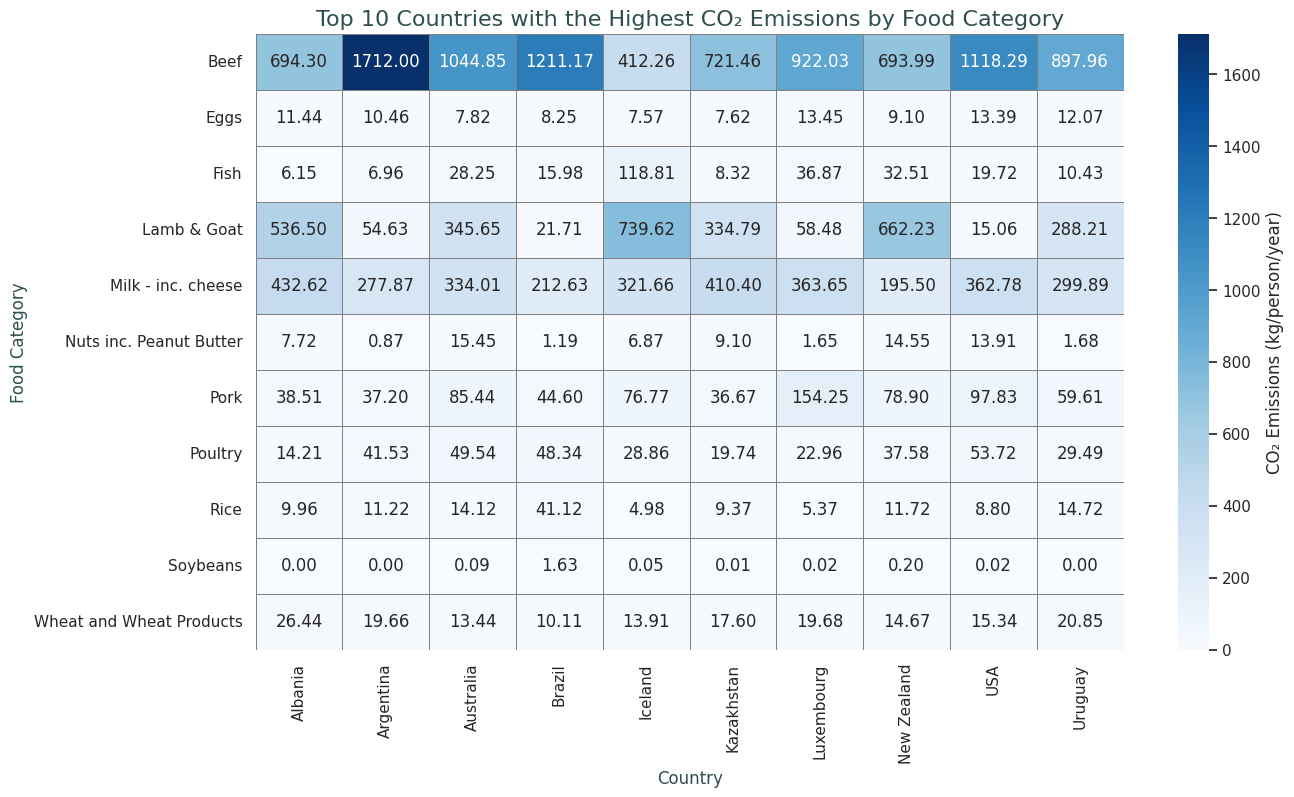

In [44]:
# Get the top 10 countries with the highest total CO2 emissions
top_countries = food_consumption.groupby('country')['co2_emission'].sum().nlargest(10).index

# Filter the data for these countries
filtered_data = food_consumption[food_consumption['country'].isin(top_countries)]

# Pivot the data: Rows are 'food_category' and columns are 'country', values are 'co2_emmission'
heatmap_data = filtered_data.pivot_table(values='co2_emission',
                                         index='food_category',
                                         columns='country',
                                         aggfunc='sum')

# Plot setup
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create the heatmap with a custom color palette and annotations
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5,
            cbar_kws={'label': 'CO₂ Emissions (kg/person/year)'}, linecolor='gray')

# Add a title with proper styling
plt.title('Top 10 Countries with the Highest CO₂ Emissions by Food Category', fontsize=16, color='#2f4f4f')

# Adjust the axis labels to make them readable and clean
plt.xlabel('Country', fontsize=12, color='#2f4f4f')
plt.ylabel('Food Category', fontsize=12, color='#2f4f4f')

# Show the plot
plt.show()


## Insights on CO₂ Emission by Food Category in East Africa and Key Global Trends

### Introduction
The exploration of CO₂ emissions by food category offers significant insights into the environmental impact of different food production systems. Specifically, analyzing the average CO₂ emissions per person across various countries highlights both regional and global trends. This analysis particularly focused on five East African countries: Kenya, Uganda, Tanzania, Rwanda, and Ethiopia. These countries, located in East Africa, represent diverse agricultural landscapes and consumption patterns that contribute to CO₂ emissions from the food sector.

### CO₂ Emission Analysis in East Africa

In the context of East Africa, it is crucial to understand how food consumption patterns influence the carbon footprint of different food categories. The region has traditionally been known for its reliance on staple foods such as grains, tubers, legumes, and vegetables. However, as incomes rise and dietary preferences shift, meat consumption is increasingly becoming a factor that contributes to CO₂ emissions, albeit at a lower rate compared to developed nations.

1. **Kenya**:
   Kenya, being the largest economy in East Africa, shows a varied carbon footprint in its food production. While plant-based foods such as maize and beans contribute relatively low CO₂ emissions, meat categories, particularly beef and poultry, have a higher emission intensity. Beef, similar to other regions globally, is a major emitter due to the methane released by cattle, along with the energy-intensive nature of the beef production process.

2. **Uganda**:
   Uganda, with its more agricultural economy, also follows a similar pattern, where plant-based foods contribute less to CO₂ emissions. However, the country is increasingly adopting intensive livestock farming, leading to a rise in methane emissions from cattle and poultry. Uganda's food production systems are generally less industrialized compared to Kenya, but with growing urbanization, these emissions are likely to increase in the coming years.

3. **Tanzania**:
   Tanzania's agricultural landscape is rich in grains and fruits, leading to a relatively low average CO₂ emission per person in food categories. However, like its East African neighbors, beef and dairy production also contribute to emissions, and as the country urbanizes and adopts more modern farming practices, these emissions are expected to rise.

4. **Rwanda**:
   Rwanda's food system is primarily based on subsistence farming, with the majority of the population relying on crops such as maize, beans, and cassava. As a result, Rwanda has one of the lowest CO₂ emissions from food production in the region. However, even in Rwanda, the shift towards animal-based protein, particularly poultry, is beginning to increase the carbon footprint of the food sector.

5. **Ethiopia**:
   Ethiopia, with its large population and reliance on livestock for both food and economic activity, has higher CO₂ emissions from animal-based food categories compared to some of its East African counterparts. The country's cattle industry contributes significantly to methane emissions. Ethiopia is also experiencing an increase in the production of dairy and beef, contributing to the growing environmental impact of food production.

### Global CO₂ Emission Patterns in Beef Production

While analyzing the food consumption data across East Africa, it is valuable to compare it with global CO₂ emissions from major food categories, particularly beef, which has the highest CO₂ emissions among animal-based foods. Countries like **Argentina**, **Australia**, **Brazil**, and the **USA** exhibit significantly higher emissions from beef production due to large-scale industrial farming practices, extensive deforestation for grazing land, and the methane produced by cattle. For instance, **Argentina** leads with the highest CO₂ emissions at **1712.00 kg CO₂/person/year**, followed by **Australia**, **Brazil**, and the **USA**, with emissions ranging from **1044.85 kg** to **1211.17 kg**.

These high emissions are primarily driven by:
- **Deforestation**: In regions like Brazil and Argentina, land conversion for cattle farming leads to massive CO₂ emissions due to the destruction of carbon-absorbing forests.
- **Methane Emissions**: Livestock, particularly cattle, emit methane, a greenhouse gas that is 25 times more potent than CO₂ over a 100-year period.
- **Intensive Farming**: In countries like the USA and Australia, industrialized beef production uses significant energy, fertilizers, and transportation, all of which add to the carbon footprint.

### Global and Regional Implications

The contrast between East African countries and global leaders in beef production reveals the differences in agricultural practices and food systems. While East African nations are still predominantly relying on plant-based foods, the region's growing urbanization and changing dietary habits may lead to an increase in CO₂ emissions in the future, especially with higher consumption of meat and dairy.

In contrast, countries like Argentina, Brazil, Australia, and the USA have already reached high levels of emissions due to their advanced agricultural systems. These countries are heavily dependent on beef production, which is both a dietary staple and an economic driver. The environmental impact of beef production in these countries underscores the need for sustainable practices, such as reforestation, methane capture, and alternative protein sources, to mitigate climate change.

### Conclusion

The analysis of CO₂ emissions by food category, particularly in East Africa, highlights the evolving dynamics of food production and consumption. While East Africa currently has a lower carbon footprint from food production, future shifts in dietary patterns may increase emissions. Globally, the high CO₂ emissions from beef production, driven by deforestation and methane emissions, present a significant challenge to achieving climate goals.

The story behind this exploration is one of balance: as countries strive to improve their food security and economic development, they must also consider the long-term environmental implications of their agricultural practices. For East African nations, this may involve promoting sustainable agricultural practices, reducing reliance on livestock, and encouraging plant-based diets. For beef-producing nations, the challenge lies in reducing emissions through more sustainable farming practices and finding alternatives to mitigate the environmental impact of beef production. Ultimately, a global effort will be needed to reduce food-related CO₂ emissions and address the broader issue of climate change.
